---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd     

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data=pd.read_csv('./AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
print('data의 필드명: \n',data.columns.tolist())
print('data의 필드개수: ',data.shape[1])
print('data의 데이터 수: ',data.shape[0])   

data의 필드명: 
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
data의 필드개수:  16
data의 데이터 수:  48895


### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [5]:
data=data[(data['name'].notnull()) & (data['host_name'].notnull())]  

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [6]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [7]:
data['price'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05     40.0
0.25     69.0
0.50    106.0
0.75    175.0
0.95    355.0
Name: price, dtype: float64

---
>- 리뷰
   - 잘해주셨습니다.
   - describe로도 위의 백분위수를 얻을 수 있어요
     - quantile처럼 parameter를 더 주셔야하지만

### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

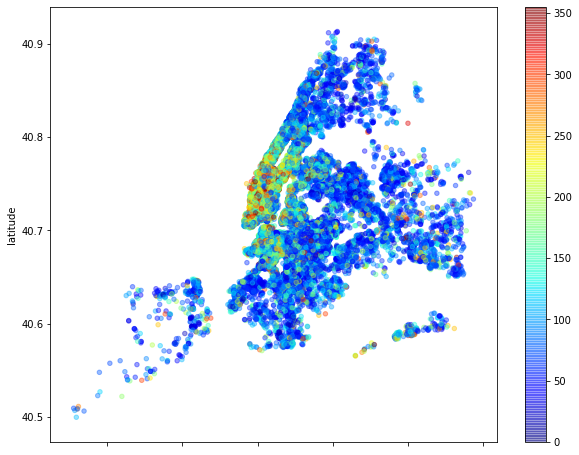

In [8]:
data_temp=data[data['price']<=355.0]  
data_temp.plot(kind='scatter',x='longitude',y='latitude',c=data_temp['price'],cmap=plt.get_cmap('jet'), alpha=0.4, figsize=(10,8),colorbar=True)
plt.ylabel('latitude')      
plt.show()            

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

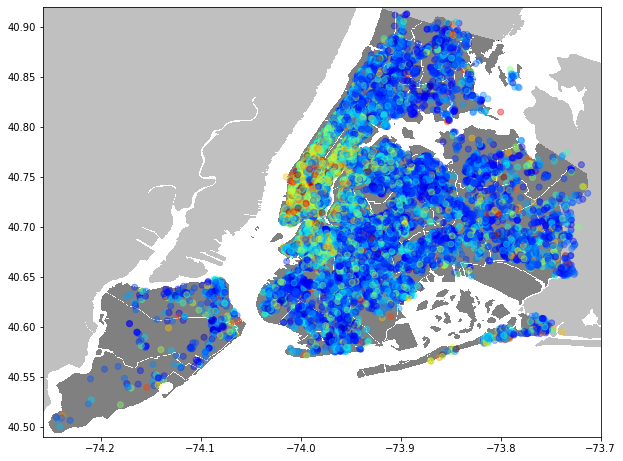

In [9]:
newyorkcity = plt.imread('newyorkcity.png')
plt.figure(figsize=(10,8))   
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])      
plt.scatter(data_temp['longitude'],data_temp['latitude'],cmap=plt.get_cmap('jet'), alpha=0.4,c=data_temp['price']) 

---
>- 리뷰
   - 이 부분은.. 의도하는 바랑 조금 다르게 흘러갔네요
   - 위에 있는 힌트코드를 사용하시면 돼요
   - ax = plt.gca() 코드가 jpg위에 그래프를 그릴 수 있도록 도와줄거에요

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [10]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re
analysis_data = data

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [11]:
analysis_data.shape

(48858, 16)

In [12]:
analysis_data['name'].value_counts()    

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
WV apt available July 24th to Aug 24th                 1
Minimalist Private Room in Queens, New York            1
Luxury Chelsea apt. walking distance to everything     1
Artist loft in Heart of Bushwick!                      1
Sunny Private Bedroom in Uptown Manhattan              1
Name: name, Length: 47884, dtype: int64

In [13]:
index=[]
for i in analysis_data['name'].index:
    m = re.search(r'[^a-zA-Z0-9\.\,\-\#\s]',analysis_data['name'][i])
    if str(m) == 'None':        
        continue  
    else:    
        index.append(i)  
         
print(index)

[0, 2, 4, 6, 7, 9, 11, 16, 21, 29, 30, 32, 33, 34, 35, 37, 40, 46, 50, 52, 53, 54, 56, 57, 58, 59, 61, 66, 67, 68, 70, 71, 72, 73, 82, 87, 90, 93, 94, 98, 101, 104, 106, 110, 114, 115, 118, 119, 128, 131, 132, 133, 134, 137, 154, 161, 162, 164, 165, 168, 172, 180, 181, 182, 187, 188, 191, 192, 194, 196, 198, 201, 202, 205, 209, 211, 212, 213, 215, 216, 217, 219, 222, 223, 224, 231, 237, 239, 246, 249, 255, 256, 257, 261, 262, 266, 272, 273, 275, 276, 277, 279, 284, 286, 292, 295, 300, 301, 304, 308, 310, 312, 314, 315, 317, 318, 320, 321, 324, 325, 327, 328, 330, 333, 335, 338, 339, 343, 349, 351, 365, 373, 375, 376, 379, 384, 387, 389, 393, 395, 398, 404, 411, 412, 415, 418, 420, 421, 423, 428, 433, 444, 445, 447, 449, 451, 452, 453, 455, 458, 462, 463, 464, 465, 466, 468, 471, 475, 476, 480, 481, 484, 487, 488, 489, 496, 499, 502, 504, 510, 516, 518, 519, 520, 521, 522, 525, 528, 529, 531, 534, 535, 540, 545, 548, 550, 557, 562, 563, 565, 566, 569, 571, 577, 579, 580, 582, 583, 584, 

In [14]:
analysis_data.drop(index,axis=0,inplace=True)  

In [15]:
analysis_data.shape

(31739, 16)

---
>- 리뷰
   - 필터링이 제대로 안된 것 같아요
   - 제대로 되었다면 (310739, 16)이 나와야 해요.
   - regex패턴을 보면 크게 잘못된 것은 없는데
   - [] 이후에 single space 하나 들어간 것이 문제인 것으로 보이네요
   - 위 패턴을 해석해보면 문제에서 제시한 패턴 이외 + single space를 가지고 있어야 걸리는 구조네요

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [16]:
analysis_data['room_type'].value_counts()  

Entire home/apt    16344
Private room       14644
Shared room          751
Name: room_type, dtype: int64

In [17]:
analysis_data.groupby('room_type')['price'].max()  

room_type
Entire home/apt    10000
Private room       10000
Shared room         1800
Name: price, dtype: int64

1. room_type이 Entire home/apt 일 때 가장 높은 가격: 10000
2. room_type이 Private room 일 때 가장 높은 가격: 10000
3. room_type이 Shared room 일 때 가장 높은 가격: 1800 

In [18]:
#1. 
analysis_data[(analysis_data['room_type']=='Entire home/apt') & (analysis_data['price']==10000)][['name','host_id','price']] 

,name,host_id,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
29238,1-BR Lincoln Center,72390391,10000


In [19]:
#2.
analysis_data[(analysis_data['room_type']=='Private room') & (analysis_data['price']==10000)][['name','host_id','price']]     

,name,host_id,price
9151,Furnished room in Astoria apartment,20582832,10000


In [20]:
#3.
analysis_data[(analysis_data['room_type']=='Shared room') & (analysis_data['price']==1800)][['name','host_id','price']] 

,name,host_id,price
14380,Mins away to Manhattan Suite Residence,24146326,1800


---
>- 리뷰
   - room_type별로 나와야 합니다.
     - Entire home/apt 하나에서만이 아니구요
   - 위에서 전처리가 잘못되어 결과값도 잘못나왔어요
   - 제대로 되었다면 총 4줄이 나와야 해요

### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

In [21]:
analysis_data_price=analysis_data[(analysis_data['price']>=0) & (analysis_data['price']<=500)]

In [22]:
analysis_data_price['room_type'].value_counts()

Entire home/apt    15875
Private room       14550
Shared room          746
Name: room_type, dtype: int64

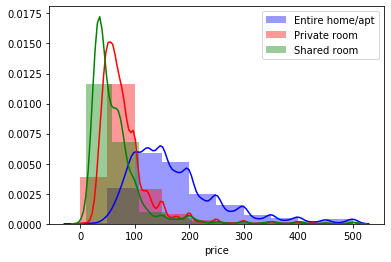

In [23]:
import seaborn as sns  
sns.distplot(analysis_data_price[analysis_data_price['room_type']=='Entire home/apt']["price"],color="blue", label="Entire home/apt",bins=10)
sns.distplot(analysis_data_price[analysis_data_price['room_type']=='Private room']["price"],color="red", label="Private room",bins=10)
sns.distplot(analysis_data_price[analysis_data_price['room_type']=='Shared room']["price"],color="green", label="Shared room",bins=10)
plt.legend()
plt.show()      

----
>- 리뷰
   - 일단.. 결과값이 다른데 전처리문제인 것으로 보이구요
   - bins가 10단위로 되는지는... 위의 코드만 봐서는 반영 안 되어 있는거 같은데
   - 육안으로는 잘 모르겠네요
   - distplot 문서를 보면 bins option이 있던데 이를 사용해보는 것도 좋을것 같네요

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [24]:
analysis_data['count']=1 
analysis_data.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,count
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,1
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,1


In [25]:
host_id_top10=analysis_data.groupby('host_id')['count'].count().sort_values(ascending=False)[:10]  
host_id_top10=pd.DataFrame(host_id_top10)
host_id_top10

,count
host_id,
61391963,83
22541573,74
120762452,50
190921808,42
30283594,38
7503643,35
16098958,35
119669058,34
113805886,32


In [26]:
m=[]
for host_id in host_id_top10.index:
    m.append(np.round(analysis_data[analysis_data['host_id']==host_id]['price'].mean(),2))   
    
host_id_top10['mean']=m     
host_id_top10  

,count,mean
host_id,,
61391963,83,146.24
22541573,74,214.53
120762452,50,171.70
190921808,42,104.45
30283594,38,292.55
7503643,35,144.14
16098958,35,192.94
119669058,34,52.56
113805886,32,215.41


In [27]:
#aggregation이용
agg_dict={
    'count':'count',
    'price':'mean'
}
np.round(analysis_data.groupby('host_id').agg(agg_dict).sort_values(by='count',ascending=False)[:10],2) 

,count,price
host_id,,
61391963,83,146.24
22541573,74,214.53
120762452,50,171.70
190921808,42,104.45
30283594,38,292.55
7503643,35,144.14
16098958,35,192.94
119669058,34,52.56
113805886,32,215.41


In [28]:
# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:') 
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)

In [30]:
#sql 이용
# pd.read_sql('select * from data', conn)
# SELECT cust_country, sum(grade) sum_grade, max(grade) max_grade, avg(age) avg_age
# , max(age) max_age FROM customer group by cust_country
   
query = '''
SELECT host_id, sum(count) count, ROUND(avg(price),2) price_mean
    FROM data GROUP BY host_id ORDER BY count DESC LIMIT 10;      
'''    
pd.read_sql(query,conn)    

,host_id,count,price_mean
0,61391963,83,146.24
1,22541573,74,214.53
2,120762452,50,171.70
3,190921808,42,104.45
4,30283594,38,292.55
5,16098958,35,192.94
6,7503643,35,144.14
7,119669058,34,52.56
8,113805886,32,215.41
9,224414117,28,214.14


---
>- 리뷰
   - 이 문제는 두 가지 방법으로 접근할 수 있습니다.
   - 첫번째는 완전 sql query를 짜서 답을 도출하는 방식과
   - 두번째는 sql로 데이터만 불러와서 pandas로 가공하는 방식입니다.
   - 답과 연관되기에 자세히 얘기해 드릴 순 없지만.. pandas를 이용해 가공하신다면
   - groupby를 이용할 수 있겠네요
  - 풀이를 조금 step으로 나눠 보자면 먼저 등록한 방이 가장 많은 10개의 host_id를 구하고, host_id별로 count와 price 평균을 구한 뒤 host_id를 기준으로 합치는 방법이 있겠네요